In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import DataLoader
from PIL import Image
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder
import tensorflow as tf
from tensorflow import keras as ks
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D # Import Conv2D and MaxPool2D
from tensorflow.keras.layers import Flatten ,Dropout
from tensorflow.keras.layers import Dense # Import the Dense layer
import warnings 
warnings.filterwarnings("ignore")


%matplotlib inline

In [2]:
training_set=tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,


)

Found 70295 files belonging to 38 classes.


In [3]:
for images, labels in training_set.take(1):
    print(images.shape)
    print(labels.shape)

    print("First image in the batch:")
    print(images[0])
    print("Label of the first image:")
    print(labels[0])

(32, 128, 128, 3)
(32, 38)
First image in the batch:
tf.Tensor(
[[[ 71.    71.75  89.25]
  [143.   144.   165.  ]
  [143.5  143.5  169.5 ]
  ...
  [165.5  166.5  186.5 ]
  [164.25 165.25 185.25]
  [164.5  165.5  185.5 ]]

 [[ 72.75  73.5   91.  ]
  [144.5  145.5  166.5 ]
  [136.25 136.25 162.25]
  ...
  [159.25 160.25 180.25]
  [165.25 166.25 186.25]
  [164.5  165.5  185.5 ]]

 [[ 71.5   72.25  89.75]
  [152.   153.   174.  ]
  [134.   134.   160.  ]
  ...
  [165.75 166.75 186.75]
  [165.5  166.5  186.5 ]
  [153.5  154.5  174.5 ]]

 ...

 [[ 69.75  72.25  92.  ]
  [139.5  144.5  166.5 ]
  [142.25 146.25 173.25]
  ...
  [198.   199.   217.  ]
  [197.75 198.75 216.75]
  [195.5  196.5  214.5 ]]

 [[ 70.    73.    93.  ]
  [138.25 143.25 165.25]
  [140.25 144.25 171.25]
  ...
  [193.5  194.5  212.5 ]
  [194.75 195.75 213.75]
  [197.25 198.25 216.25]]

 [[ 69.5   72.25  92.25]
  [135.25 140.25 162.25]
  [137.   141.   168.  ]
  ...
  [174.25 175.25 193.25]
  [178.75 179.75 197.75]
  [188.75

In [4]:
def preprocess_image(image, label):
    image = tf.cast(image/255.0, tf.float32)  # Normalize to [0, 1]
    return image, label

In [5]:

# Apply preprocessing
training_set = training_set.map(preprocess_image)




In [6]:
for images, labels in training_set.take(1):
    print(images.shape)
    print(labels.shape)

    print("First image in the batch:")
    print(images[0])
    print("Label of the first image:")
    print(labels[0])

(32, 128, 128, 3)
(32, 38)
First image in the batch:
tf.Tensor(
[[[0.57058823 0.49215686 0.5       ]
  [0.53039217 0.45196077 0.4598039 ]
  [0.54313725 0.46470588 0.47254902]
  ...
  [0.58431375 0.5254902  0.5529412 ]
  [0.59117645 0.5323529  0.5598039 ]
  [0.6401961  0.58137256 0.60882354]]

 [[0.56960785 0.49117646 0.4990196 ]
  [0.53039217 0.45196077 0.4598039 ]
  [0.50392157 0.4254902  0.43333334]
  ...
  [0.5862745  0.527451   0.55490196]
  [0.6431373  0.58431375 0.6117647 ]
  [0.5901961  0.53137255 0.5588235 ]]

 [[0.4882353  0.40980393 0.41764706]
  [0.5019608  0.42352942 0.43137255]
  [0.48921567 0.4107843  0.41862744]
  ...
  [0.62647057 0.56764704 0.595098  ]
  [0.6245098  0.5656863  0.59313726]
  [0.64705884 0.5882353  0.6156863 ]]

 ...

 [[0.63235295 0.55       0.577451  ]
  [0.6068627  0.5245098  0.55196077]
  [0.6068627  0.5245098  0.55196077]
  ...
  [0.62647057 0.5637255  0.60294116]
  [0.6627451  0.6        0.6392157 ]
  [0.6382353  0.5754902  0.61470586]]

 [[0.60392

Explanation
(32, 38), this indicates that your dataset has 38 classes. Each label in the batch is represented as a one-hot encoded vector of length 38, where each vector corresponds to one of the 38 possible classes.

In [7]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,


)

Found 17572 files belonging to 38 classes.


In [8]:
for images, labels in validation_set.take(1):
    print(images.shape)
    print(labels.shape)

    print("First image in the batch:")
    print(images[0])
    print("Label of the first image:")
    print(labels[0])

(32, 128, 128, 3)
(32, 38)
First image in the batch:
tf.Tensor(
[[[ 52.5   47.    68.5 ]
  [101.75  92.75 119.75]
  [102.25  93.25 124.25]
  ...
  [169.   168.   199.  ]
  [167.   166.   197.  ]
  [168.   167.   198.  ]]

 [[ 52.75  47.25  68.75]
  [103.25  94.25 121.25]
  [102.    93.   124.  ]
  ...
  [169.75 168.75 199.75]
  [165.   164.   195.  ]
  [165.   164.   195.  ]]

 [[ 52.75  47.25  68.75]
  [101.5   92.5  119.5 ]
  [100.25  91.25 122.25]
  ...
  [169.5  168.5  199.5 ]
  [163.5  162.5  193.5 ]
  [164.   163.   194.  ]]

 ...

 [[ 62.5   52.5   66.5 ]
  [121.25 108.25 127.25]
  [127.75 113.75 137.75]
  ...
  [183.25 183.25 211.25]
  [185.5  185.5  213.5 ]
  [186.25 186.25 214.25]]

 [[ 63.5   53.25  67.5 ]
  [122.5  109.5  128.5 ]
  [127.75 113.75 137.75]
  ...
  [182.5  182.5  210.5 ]
  [185.   185.   213.  ]
  [185.5  185.5  213.5 ]]

 [[ 66.    54.25  70.  ]
  [121.75 108.75 127.75]
  [126.25 112.25 136.25]
  ...
  [182.75 182.75 210.75]
  [183.5  183.5  211.5 ]
  [183.  

Normilized the data

In [9]:
validation_set=validation_set.map(preprocess_image)

In [10]:
for images, labels in validation_set.take(1):
    print(images.shape)
    print(labels.shape)

    print("First image in the batch:")
    print(images[0])
    print("Label of the first image:")
    print(labels[0])

(32, 128, 128, 3)
(32, 38)
First image in the batch:
tf.Tensor(
[[[0.20588236 0.18431373 0.26862746]
  [0.3990196  0.36372548 0.46960783]
  [0.40098038 0.36568627 0.4872549 ]
  ...
  [0.6627451  0.65882355 0.78039217]
  [0.654902   0.6509804  0.77254903]
  [0.65882355 0.654902   0.7764706 ]]

 [[0.20686275 0.18529412 0.26960784]
  [0.40490195 0.36960784 0.47549018]
  [0.4        0.3647059  0.4862745 ]
  ...
  [0.66568625 0.6617647  0.78333336]
  [0.64705884 0.6431373  0.7647059 ]
  [0.64705884 0.6431373  0.7647059 ]]

 [[0.20686275 0.18529412 0.26960784]
  [0.39803922 0.3627451  0.46862745]
  [0.39313725 0.35784313 0.47941175]
  ...
  [0.6647059  0.6607843  0.7823529 ]
  [0.64117646 0.6372549  0.7588235 ]
  [0.6431373  0.6392157  0.7607843 ]]

 ...

 [[0.24509804 0.20588236 0.26078433]
  [0.47549018 0.4245098  0.4990196 ]
  [0.5009804  0.44607842 0.54019606]
  ...
  [0.71862745 0.71862745 0.82843137]
  [0.72745097 0.72745097 0.8372549 ]
  [0.73039216 0.73039216 0.8401961 ]]

 [[0.24901

In [11]:
training_set

<_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def get_class_names(directory):
    """Extract class names from the directory structure."""
    class_names = sorted([d.name for d in os.scandir(directory) if d.is_dir()])
    return class_names

# Define your dataset directories
train_directory = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

valid_directory ='/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'


# Get class names from the training directory
class_names = get_class_names(train_directory)

def display_training_leaf_image(leaf_number):
    # Calculate which batch the leaf_number corresponds to
    batch_size = 32
    leaf_number -= 1  # Convert to 0-based index
    batch_index = leaf_number // batch_size
    image_index = leaf_number % batch_size

    # Take the specific batch
    for i, (images, labels) in enumerate(training_set):
        if i == batch_index:
            # Get the class index and class name for the specific image
            class_index = tf.argmax(labels[image_index]).numpy()
            class_name = class_names[class_index]

            # Convert normalized image back to 0-255
            image = images[image_index].numpy()
            image = (image * 255).astype("uint8")  # Rescale back to 0-255

            # Display the image with its class name
            plt.figure()
            plt.imshow(image)
            plt.title(f"Class: {class_name}")
            plt.axis('off')  # Hide axes
            plt.show()
            break


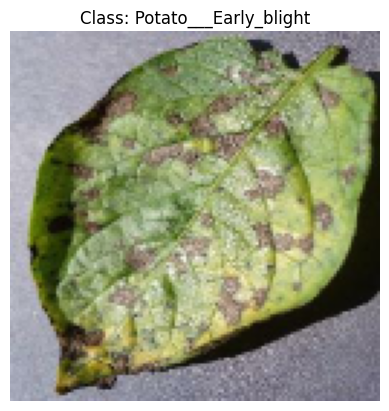

In [13]:
display_training_leaf_image(50)

In [14]:
import matplotlib.pyplot as plt
import tensorflow as tf

def show_batch_with_class_names(data):
    for images, labels in data:
        batch_size = images.shape[0]

        # Create a grid of subplots
        fig, axes = plt.subplots(4, 8, figsize=(30, 30))  # Adjust rows and cols to fit the batch size
        axes = axes.flatten()

        for img, label, ax in zip(images, labels, axes):
            # Find the index of the class with the highest probability in the label
            class_index = tf.argmax(label).numpy()

            # Get the class name
            class_name = class_names[class_index]

            # Convert normalized image back to 0-255
            img = img.numpy()
            img = (img * 255).astype("uint8")  # Rescale back to 0-255

            # Display the image with its class name
            ax.imshow(img)
            ax.set_title(class_name)
            ax.axis('off')  # Hide axes

        plt.tight_layout()
        plt.show()
        break  # Display only the first batch


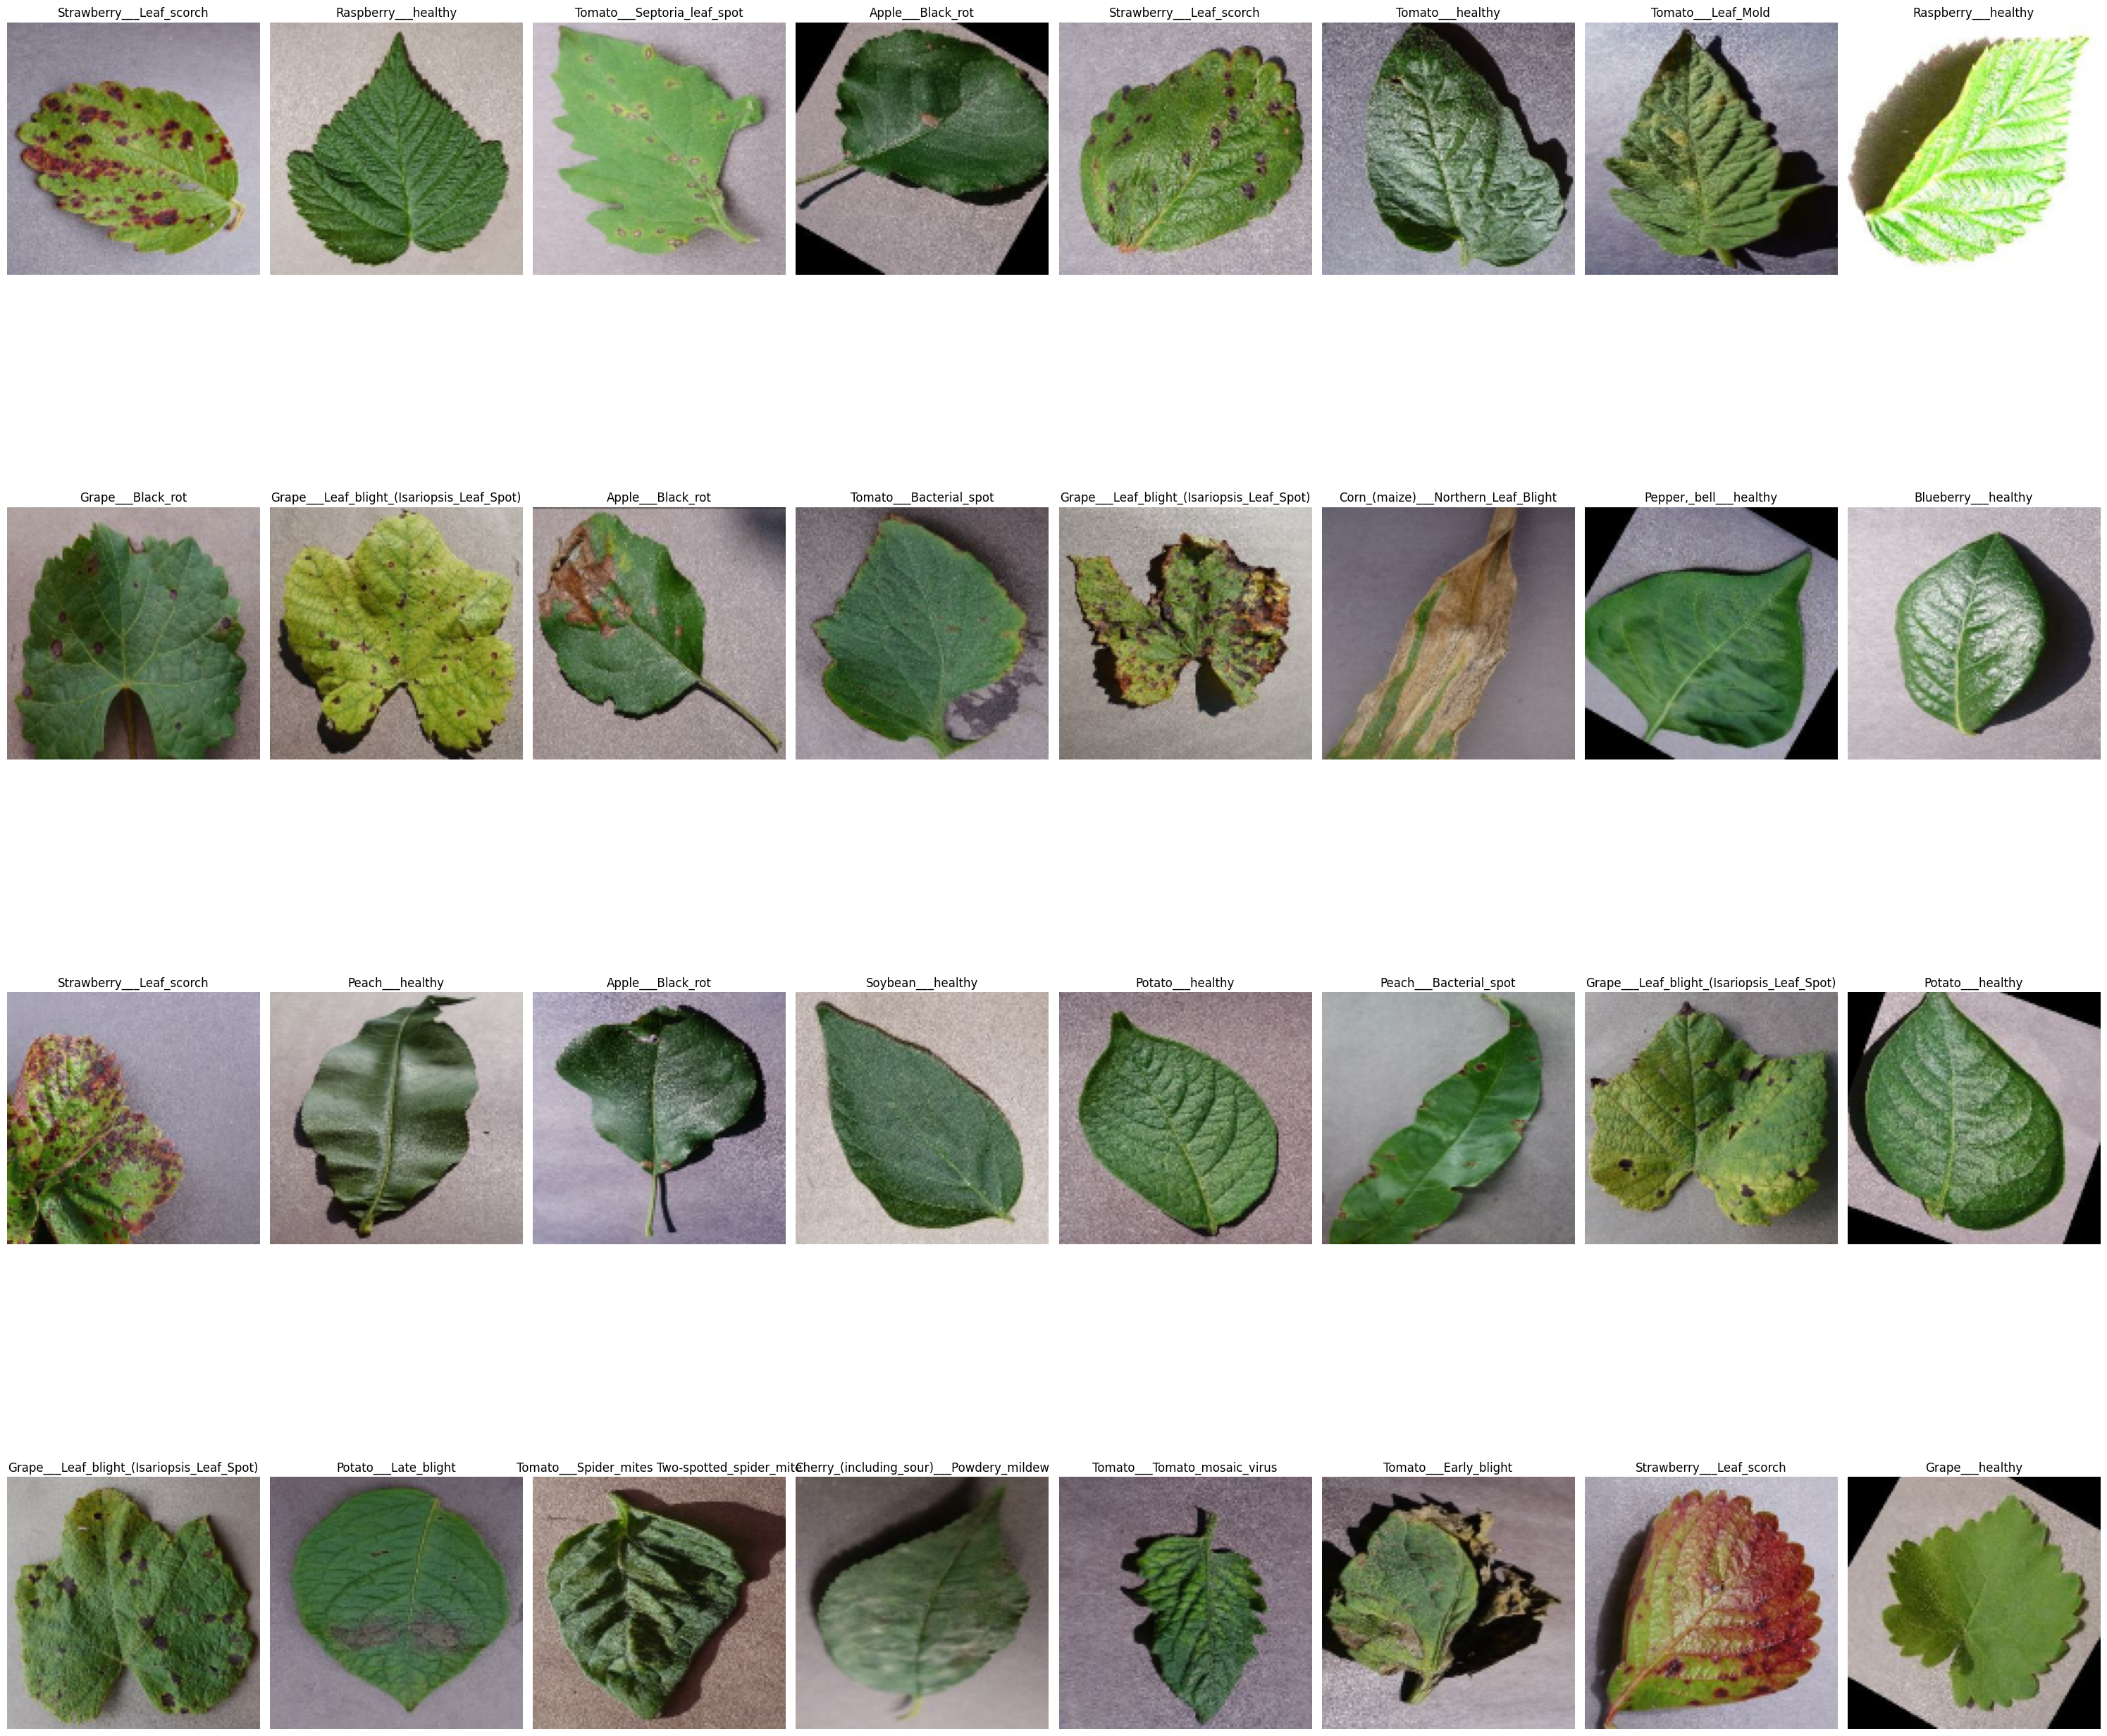

In [15]:
show_batch_with_class_names(training_set)

In [16]:
diseases = os.listdir('/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train')

In [17]:
# printing the disease names
print(diseases)

['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___Leaf_Mold', 'Tomato__

In [18]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

In [19]:
# number of unique plants
print("Number of plants: {}".format(len(plants)))

Number of plants: 14


In [20]:
# unique plants in the dataset
print(f"Unique Plants are: \n{plants}")

Unique Plants are: 
['Tomato', 'Grape', 'Orange', 'Soybean', 'Squash', 'Potato', 'Corn_(maize)', 'Strawberry', 'Peach', 'Apple', 'Blueberry', 'Cherry_(including_sour)', 'Pepper,_bell', 'Raspberry']


In [21]:
# number of unique diseases
print("Number of diseases: {}".format(NumberOfDiseases))

Number of diseases: 26


So we have images of leaves of 14 plants and while excluding healthy leaves, we have 26 types of images that show a particular disease in a particular plant.

In [22]:
# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir('/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train' + '/' + disease))

# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class


no. of images
Tomato___Late_blight                                         1851
Tomato___healthy                                             1926
Grape___healthy                                              1692
Orange___Haunglongbing_(Citrus_greening)                     2010
Soybean___healthy                                            2022
Squash___Powdery_mildew                                      1736
Potato___healthy                                             1824
Corn_(maize)___Northern_Leaf_Blight                          1908
Tomato___Early_blight                                        1920
Tomato___Septoria_leaf_spot                                  1745
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot           1642
Strawberry___Leaf_scorch                                     1774
Peach___healthy                                              1728
Apple___Apple_scab                                           2016
Tomato___Tomato_Yellow_Leaf_Curl_Virus                       1961
Tomato___Bacterial_spot                                      1702
Apple___Black_rot                                            1987
Blueberry___healthy                                          1816
Cherry_(including_sour)___Powdery_mildew                     1683
Peach___Bacterial_spot                                       1838
Apple___Cedar_apple_rust                                     1760
Tomato___Target_Spot                                         1827
Pepper,_bell___healthy                                       1988
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                   1722
Potato___Late_blight                                         1939
Tomato___Tomato_mosaic_virus                                 1790
Strawberry___healthy                                         1824
Apple___healthy                                              2008
Grape___Black_rot                                            1888
Potato___Early_blight                                        1939
Cherry_(including_sour)___healthy                            1826
Corn_(maize)___Common_rust_                                  1907
Grape___Esca_(Black_Measles)                                 1920
Raspberry___healthy                                          1781
Tomato___Leaf_Mold                                           1882
Tomato___Spider_mites Two-spotted_spider_mite                1741
Pepper,_bell___Bacterial_spot                                1913
Corn_(maize)___healthy                                       1859

Visualizing the above information on a graph

Text(0.5, 1.0, 'Images per each class of plant disease')

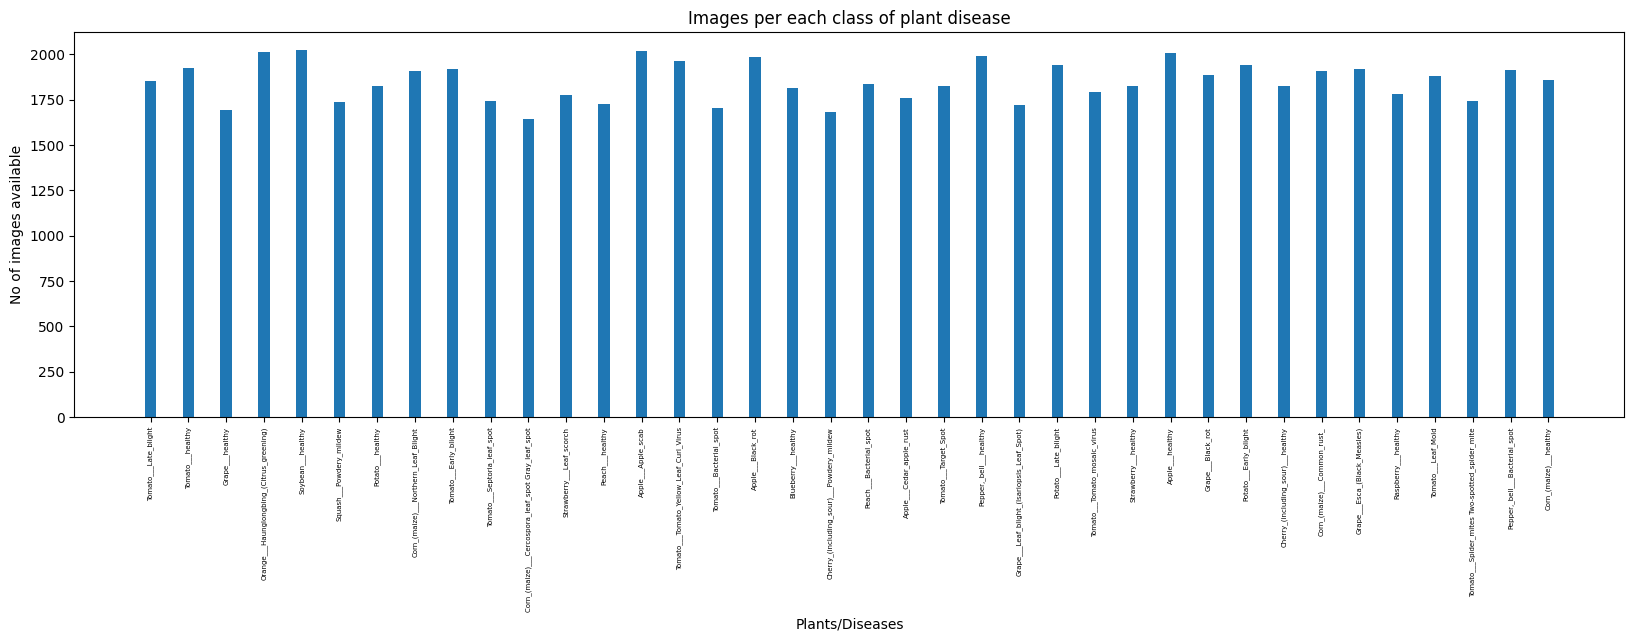

In [23]:
# plotting number of images available for each disease
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

We can see that the dataset is Almost balanced for all classes, so we are good to go forward

Image available for training

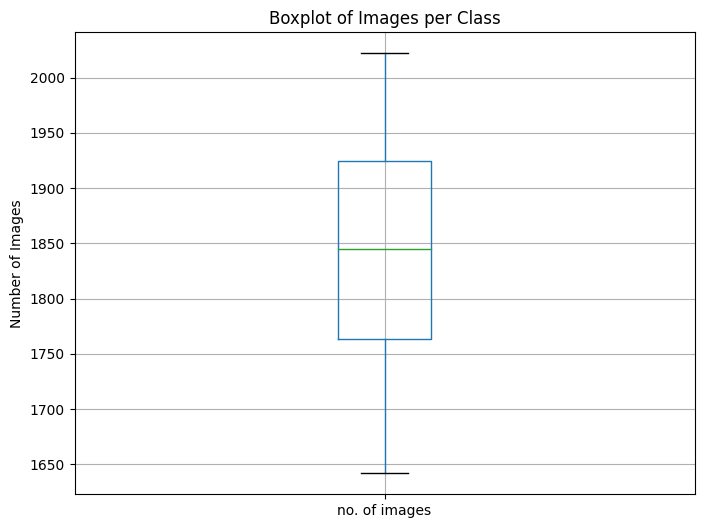

In [24]:
# Boxplot to identify outliers in the number of images per class
img_per_class.boxplot(figsize=(8, 6))
plt.title("Boxplot of Images per Class")
plt.ylabel("Number of Images")
plt.show()

In [25]:
print('There are ',img_per_class['no. of images'].sum(),"images avilable for training")


There are  70295 images avilable for training


To avoid Overshooting 
Choose small learning rate default 0.0001 we are taking 0.0001
There may be chance of underfitting,so increase number of neuron
Add more convolution layer to extract more feature from images there may be posibility that model unable to capture relevent feature or model is confusing due to lack of feature so feedwith more feature

**Model Building**

Why padding='same' in the First Convolution and padding='valid' in the Second?
First Convolution with padding='same':

Reason: In many networks, the first few layers are designed to capture low-level features while preserving spatial dimensions. Using padding='same' helps in retaining the spatial resolution, allowing subsequent layers to operate on a full-size feature map, which can be important for capturing detailed patterns.


Second Convolution with padding='valid':
Reason: After some initial layers, the network might focus on extracting more complex features where spatial resolution can be reduced without losing essential information. Using padding='valid' reduces the size of the feature maps, which can help in reducing computational load and focusing on higher-level features.

***Model1***

In [71]:
from tensorflow.keras import layers, regularizers
model = Sequential()
#model.add(layers.InputLayer(input_shape=(128, 128, 3)))  # Define input shape

# Adding convolutional and pooling layers
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01),activation='relu',input_shape=[128,128,3]))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=2, strides=2))
# Adding 2nd convolutional and pooling layers
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same',kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=2, strides=2))

# Adding convolutional and pooling layers
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same',kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=2, strides=2))

model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=2, strides=2))

model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='valid',kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=2, strides=2))

#adding dense layers
model.add(Dropout(0.25))#to avoid overfitting
model.add(Flatten())

model.add(Dense(units=1200,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(units=700,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
#output layer
model.add(Dense(units=38,activation='softmax'))




In [72]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 2, 2, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 6,199,130 (23.65 MB)

 Trainable params: 6,197,146 (23.64 MB)

 Non-trainable params: 1,984 (7.75 KB)

<strong>Learning Rate Scheduling:</strong><p> Instead of using a fixed learning rate, we will use a learning rate scheduler, which will change the learning rate after every batch of training. There are many strategies for varying the learning rate during training, and the one we’ll use is called the “One Cycle Learning Rate Policy”, which involves starting with a low learning rate, gradually increasing it batch-by-batch to a high learning rate for about 30% of epochs, then gradually decreasing it to a very low value for the remaining epochs.</p>

<strong>Weight Decay:</strong><p> We also use weight decay, which is a regularization technique which prevents the weights from becoming too large by adding an additional term to the loss function.</p>

In [29]:
#learning rate schedular
from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=5,
                                            verbose=1,
                                            factor=0.1,
                                            min_lr=0.00001)

factor=0.1: This parameter determines the factor by which the learning rate will be reduced. The new learning rate will be the current learning rate multiplied by this factor (lr * factor). In this case, the learning rate will be reduced to 10% of its current value.

In [30]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',             # Metric to monitor
    patience=5,                     # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True       # Restore model weights from the epoch with the best value of the monitored metric
)


In [31]:

# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # Use the non-legacy Adam optimizer
#     loss='categorical_crossentropy',  # Correct loss function name
#     metrics=['accuracy']
# )

In [39]:
# training_history=model.fit(x=training_set,validation_data=validation_set,epochs=50,
#     callbacks=[early_stopping,learning_rate_reduction])

Epoch 1/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 66s 30ms/step - accuracy: 0.8444 - loss: 3.2869 - val_accuracy: 0.8798 - val_loss: 1.5305 - learning_rate: 1.0000e-04
Epoch 2/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 65s 30ms/step - accuracy: 0.9315 - loss: 1.1909 - val_accuracy: 0.9269 - val_loss: 0.8772 - learning_rate: 1.0000e-04
Epoch 3/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 65s 30ms/step - accuracy: 0.9499 - loss: 0.7471 - val_accuracy: 0.9336 - val_loss: 0.6834 - learning_rate: 1.0000e-04
Epoch 4/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 65s 29ms/step - accuracy: 0.9577 - loss: 0.5766 - val_accuracy: 0.9509 - val_loss: 0.5411 - learning_rate: 1.0000e-04
Epoch 5/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 65s 29ms/step - accuracy: 0.9663 - loss: 0.4764 - val_accuracy: 0.9110 - val_loss: 0.6172 - learning_rate: 1.0000e-04


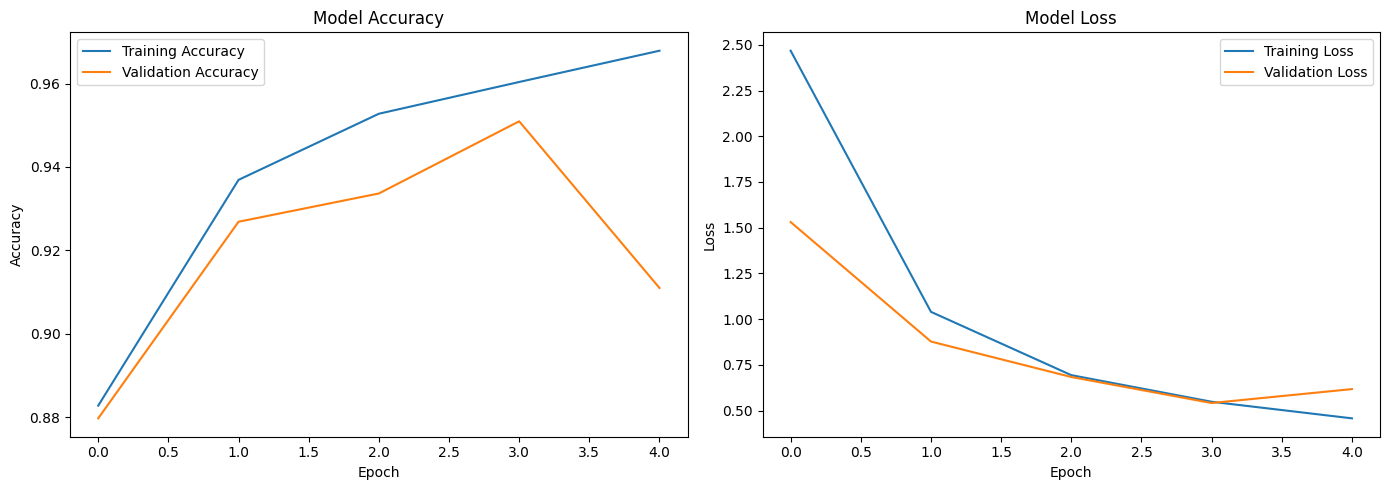

In [40]:
# import matplotlib.pyplot as plt

# # Extract history data
# history_dict = training_history.history

# # Plot training & validation accuracy values
# plt.figure(figsize=(14, 5))

# plt.subplot(1, 2, 1)
# plt.plot(history_dict['accuracy'], label='Training Accuracy')
# plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(loc='best')

# # Plot training & validation loss values
# plt.subplot(1, 2, 2)
# plt.plot(history_dict['loss'], label='Training Loss')
# plt.plot(history_dict['val_loss'], label='Validation Loss')
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend(loc='best')

# plt.tight_layout()
# plt.show()


In [34]:
# from tensorflow.keras import layers, regularizers
# model = Sequential()
# #model.add(layers.InputLayer(input_shape=(128, 128, 3)))  # Define input shape

# # Adding convolutional and pooling layers
# model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01),activation='relu',input_shape=[128,128,3]))
# model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D(pool_size=2, strides=2))
# # Adding 2nd convolutional and pooling layers
# model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same',kernel_regularizer=regularizers.l2(0.01), activation='relu'))
# model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D(pool_size=2, strides=2))

# # Adding convolutional and pooling layers
# model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same',kernel_regularizer=regularizers.l2(0.01), activation='relu'))
# model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D(pool_size=2, strides=2))

# model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D(pool_size=2, strides=2))

# model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='valid',kernel_regularizer=regularizers.l2(0.01), activation='relu'))
# model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D(pool_size=2, strides=2))

# #adding dense layers
# model.add(Dropout(0.25))#to avoid overfitting
# model.add(Flatten())

# model.add(Dense(units=1200,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dropout(0.4))
# #output layer
# model.add(Dense(units=38,activation='softmax'))




In [42]:
# model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 2, 2, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 16,128,324 (61.52 MB)

 Trainable params: 5,375,446 (20.51 MB)

 Non-trainable params: 1,984 (7.75 KB)

 Optimizer params: 10,750,894 (41.01 MB)

In [36]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # Use the non-legacy Adam optimizer
    loss='categorical_crossentropy',  # Correct loss function name
    metrics=['accuracy']
)

In [37]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=20,
    callbacks=[early_stopping,learning_rate_reduction])

Epoch 1/20
   5/2197 ━━━━━━━━━━━━━━━━━━━━ 1:00 28ms/step - accuracy: 0.0168 - loss: 16.9683

I0000 00:00:1732737908.787170      80 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_3', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_2', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_1', 4 bytes spill stores, 12 bytes spill loads



2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5055 - loss: 11.3537

I0000 00:00:1732737972.887089      81 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_3', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_2', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_1', 4 bytes spill stores, 12 bytes spill loads



2197/2197 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.5056 - loss: 11.3524 - val_accuracy: 0.7866 - val_loss: 4.5764 - learning_rate: 1.0000e-04
Epoch 2/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 65s 29ms/step - accuracy: 0.8704 - loss: 3.4135 - val_accuracy: 0.8975 - val_loss: 1.6697 - learning_rate: 1.0000e-04
Epoch 3/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 65s 30ms/step - accuracy: 0.9237 - loss: 1.3839 - val_accuracy: 0.8792 - val_loss: 1.1061 - learning_rate: 1.0000e-04
Epoch 4/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 65s 30ms/step - accuracy: 0.9455 - loss: 0.8447 - val_accuracy: 0.8228 - val_loss: 1.1038 - learning_rate: 1.0000e-04
Epoch 5/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 66s 30ms/step - accuracy: 0.9564 - loss: 0.6306 - val_accuracy: 0.9451 - val_loss: 0.5926 - learning_rate: 1.0000e-04


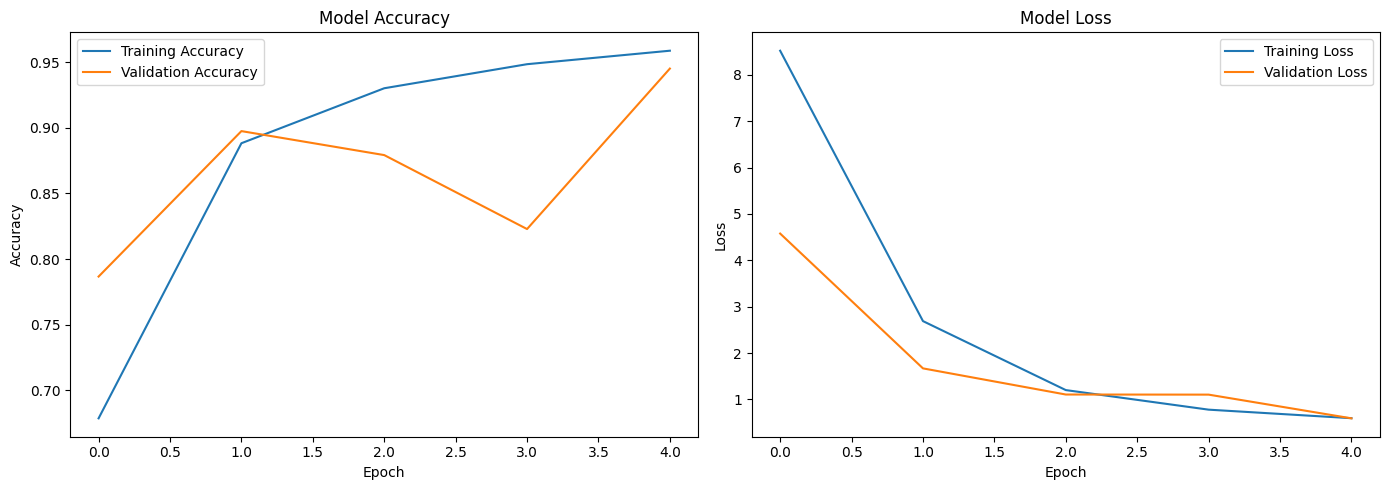

In [38]:
import matplotlib.pyplot as plt

# Extract history data
history_dict = training_history.history

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [ ]:
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

In [ ]:
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

In [ ]:
model.save("model1.h5")

In [ ]:
training_history.history #Return Dictionary of history

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

**Now We will train some Pre-trained Models**

**For Feature Extraction Technique**

In [30]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import regularizers
import tensorflow as tf

# Load the pretrained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers
base_model.trainable = False

# Create the sequential model
vgg_trained = Sequential()
vgg_trained.add(base_model)  # Add the base model
vgg_trained.add(Flatten())  # Flatten layer
vgg_trained.add(Dense(units=1200, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # Dense layer
vgg_trained.add(Dropout(0.4))  # Dropout layer
vgg_trained.add(Dense(units=700, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # Dense layer
vgg_trained.add(Dropout(0.3))  # Dropout layer
vgg_trained.add(Dense(units=38, activation='softmax'))  # Output layer

# Build the model by specifying the input shape explicitly
vgg_trained.build(input_shape=(None, 128, 128, 3))  # Batch size is flexible

# Check model summary
vgg_trained.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1200)           │     9,831,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 700)            │       840,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 700)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 38)             │        26,638 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,413,626 (96.95 MB)

 Trainable params: 10,698,938 (40.81 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [31]:
# Compile the model
vgg_trained.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Optional: Define early stopping callback
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


In [32]:
#learning rate schedular
from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=5,
                                            verbose=1,
                                            factor=0.1,
                                            min_lr=0.00001)

In [33]:
history=vgg_trained.fit(x=training_set,validation_data=validation_set,epochs=20,
    callbacks=[early_stopping,learning_rate_reduction])

Epoch 1/20


I0000 00:00:1733057180.260350      83 service.cc:145] XLA service 0x7a8aa804d0a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733057180.260425      83 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


   6/2197 ━━━━━━━━━━━━━━━━━━━━ 53s 24ms/step - accuracy: 0.0360 - loss: 33.5219 

I0000 00:00:1733057187.644171      83 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 179s 77ms/step - accuracy: 0.5686 - loss: 11.7936 - val_accuracy: 0.8494 - val_loss: 2.2849 - learning_rate: 1.0000e-04
Epoch 2/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 63s 29ms/step - accuracy: 0.7998 - loss: 2.0116 - val_accuracy: 0.8544 - val_loss: 1.2281 - learning_rate: 1.0000e-04
Epoch 3/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 64s 29ms/step - accuracy: 0.8113 - loss: 1.2663 - val_accuracy: 0.8547 - val_loss: 1.0328 - learning_rate: 1.0000e-04
Epoch 4/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 63s 29ms/step - accuracy: 0.8173 - loss: 1.1144 - val_accuracy: 0.8632 - val_loss: 0.9590 - learning_rate: 1.0000e-04
Epoch 5/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 63s 29ms/step - accuracy: 0.8273 - loss: 0.9891 - val_accuracy: 0.8507 - val_loss: 0.9309 - learning_rate: 1.0000e-04
Epoch 8/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 63s 29ms/step - accuracy: 0.8321 - loss: 0.9684 - val_accuracy: 0.8693 - val_loss: 0.8582 - learning_rate: 1.0000e-04
Epoch 9/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 63s 29m

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2197/2197 ━━━━━━━━━━━━━━━━━━━━ 63s 29ms/step - accuracy: 0.8420 - loss: 0.8884 - val_accuracy: 0.8757 - val_loss: 0.7973 - learning_rate: 1.0000e-04
Epoch 14/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 63s 29ms/step - accuracy: 0.8431 - loss: 0.8687 - val_accuracy: 0.8805 - val_loss: 0.7621 - learning_rate: 1.0000e-04
Epoch 16/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 63s 29ms/step - accuracy: 0.8492 - loss: 0.8456 - val_accuracy: 0.8821 - val_loss: 0.7651 - learning_rate: 1.0000e-04
Epoch 17/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 63s 29ms/step - accuracy: 0.8487 - loss: 0.8457 - val_accuracy: 0.8856 - val_loss: 0.7482 - learning_rate: 1.0000e-04
Epoch 18/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 63s 29ms/step - accuracy: 0.8517 - loss: 0.8317 - val_accuracy: 0.8750 - val_loss: 0.7577 - learning_rate: 1.0000e-04
Epoch 19/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 63s 29ms/step - accuracy: 0.8512 - loss: 0.8222 - val_accuracy: 0.8822 - val_loss: 0.7446 - learning_rate: 1.0000e-04
Epoch 20/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 63s

In [ ]:
import matplotlib.pyplot as plt

# Extract history data
history_dict = history.history

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


**Fined Tuning**

In [34]:
base_model.trainable=True
set_trainable=False
for layer in base_model.layers:
    if layer.name=='block5_conv1':
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False


for layer in base_model.layers:
    print(layer.name, layer.trainable)

input_layer_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [37]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

# Load the pretrained VGG16 model, excluding the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Make certain layers trainable (fine-tuning from 'block5_conv1' onwards)
base_model.trainable = True
set_trainable = False
for layer in base_model.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    layer.trainable = set_trainable

# Add your fully connected layers
x = Flatten()(base_model.output)
x = Dense(units=1200, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)  # Dense layer
x = Dropout(0.4)(x)  # Dropout layer
x = Dense(units=700, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)  # Dense layer
x = Dropout(0.3)(x)  # Dropout layer
output = Dense(units=38, activation='softmax')(x)  # Output layer

# Combine the base model and the new layers
model = Model(inputs=base_model.input, outputs=output)

# Display the model summary
model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1200)           │     9,831,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 700)            │       840,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 700)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 38)             │        26,63

 Total params: 25,413,626 (96.95 MB)

 Trainable params: 17,778,362 (67.82 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [39]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Optional: Define early stopping callback
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [40]:
#learning rate schedular
from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=5,
                                            verbose=1,
                                            factor=0.1,
                                            min_lr=0.00001)

In [41]:
history=model.fit(x=training_set,validation_data=validation_set,epochs=20,
    callbacks=[early_stopping,learning_rate_reduction])

Epoch 1/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 89s 38ms/step - accuracy: 0.6894 - loss: 12.0600 - val_accuracy: 0.9429 - val_loss: 1.6123 - learning_rate: 1.0000e-04
Epoch 2/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.9322 - loss: 1.1877 - val_accuracy: 0.9497 - val_loss: 0.4503 - learning_rate: 1.0000e-04
Epoch 3/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.9511 - loss: 0.3994 - val_accuracy: 0.9479 - val_loss: 0.3223 - learning_rate: 1.0000e-04
Epoch 4/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 78s 36ms/step - accuracy: 0.9668 - loss: 0.2539 - val_accuracy: 0.9600 - val_loss: 0.2514 - learning_rate: 1.0000e-04
Epoch 5/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.9745 - loss: 0.1989 - val_accuracy: 0.9647 - val_loss: 0.2284 - learning_rate: 1.0000e-04
Epoch 6/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.9791 - loss: 0.1748 - val_accuracy: 0.9601 - val_loss: 0.2306 - learning_rate: 1.0000e-04
Epoch 7/20
2197/2197 ━━━━━━━━━━━━━━━━━━

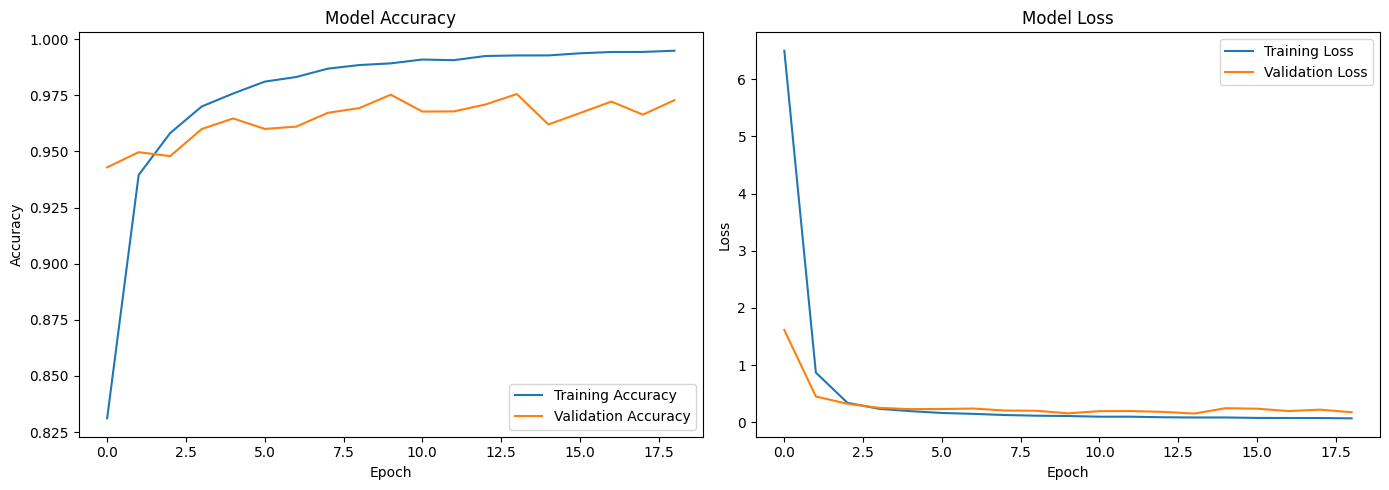

In [42]:
import matplotlib.pyplot as plt

# Extract history data
history_dict = history.history

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [48]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import regularizers
import tensorflow as tf

# Load the pretrained ResNet-50 model without the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


In [49]:

# Freeze the base model layers
base_model.trainable = False

# Create the sequential model
resnet_trained = Sequential()
resnet_trained.add(base_model)  # Add the base model
resnet_trained.add(Flatten())  # Flatten layer
resnet_trained.add(Dense(units=1200, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # Dense layer
resnet_trained.add(Dropout(0.4))  # Dropout layer
resnet_trained.add(Dense(units=700, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # Dense layer
resnet_trained.add(Dropout(0.3))  # Dropout layer
resnet_trained.add(Dense(units=38, activation='softmax'))  # Output layer

# Build the model by specifying the input shape explicitly
resnet_trained.build(input_shape=(None, 128, 128, 3))  # Batch size is flexible

# Check model summary
resnet_trained.summary()

# Compile the model
resnet_trained.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_loss',
    patience=5,
    verbose=1,
    factor=0.1,
    min_lr=0.00001
)

# Train the model
history_res = resnet_trained.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=20,
    callbacks=[early_stopping, learning_rate_reduction]
)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 4, 4, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1200)           │    39,322,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 700)            │       840,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 700)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 38)             │        26,638 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,777,850 (243.29 MB)

 Trainable params: 40,190,138 (153.31 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 92s 36ms/step - accuracy: 0.0742 - loss: 8.8254 - val_accuracy: 0.2280 - val_loss: 3.1626 - learning_rate: 1.0000e-04
Epoch 2/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 65s 30ms/step - accuracy: 0.2128 - loss: 3.1205 - val_accuracy: 0.3301 - val_loss: 2.7126 - learning_rate: 1.0000e-04
Epoch 3/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 66s 30ms/step - accuracy: 0.2826 - loss: 2.7705 - val_accuracy: 0.3628 - val_loss: 2.5366 - learning_rate: 1.0000e-04
Epoch 4/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 65s 30ms/step - accuracy: 0.3578 - loss: 2.4711 - val_accuracy: 0.4343 - val_loss: 2.2667 - learning_rate: 1.0000e-04
Epoch 7/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 66s 30ms/step - accuracy: 0.3725 - loss: 2.4280 - val_accuracy: 0.3859 - val_loss: 2.3300 - learning_rate: 1.0000e-04
Epoch 8/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 65s 30ms/step - accuracy: 0.3828 - loss: 2.3822 - val_accuracy: 0.4310 - val_loss: 2.2501 - learning_rate: 1.0000e-04
Epoch 9/20
1302/2197 ━━━━━━━━━━━━━━━━━━━

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2197/2197 ━━━━━━━━━━━━━━━━━━━━ 66s 30ms/step - accuracy: 0.4157 - loss: 2.2746 - val_accuracy: 0.4854 - val_loss: 2.0718 - learning_rate: 1.0000e-04
Epoch 13/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 65s 30ms/step - accuracy: 0.4274 - loss: 2.2438 - val_accuracy: 0.4794 - val_loss: 2.0792 - learning_rate: 1.0000e-04
Epoch 14/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 65s 29ms/step - accuracy: 0.4281 - loss: 2.2222 - val_accuracy: 0.4686 - val_loss: 2.0675 - learning_rate: 1.0000e-04
Epoch 15/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 65s 30ms/step - accuracy: 0.4364 - loss: 2.2009 - val_accuracy: 0.4738 - val_loss: 2.1102 - learning_rate: 1.0000e-04
Epoch 16/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 66s 30ms/step - accuracy: 0.4410 - loss: 2.1931 - val_accuracy: 0.4901 - val_loss: 2.0883 - learning_rate: 1.0000e-04
Epoch 17/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 66s 30ms/step - accuracy: 0.4436 - loss: 2.1795 - val_accuracy: 0.5032 - val_loss: 1.9927 - learning_rate: 1.0000e-04
Epoch 18/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 66s

In [53]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

# Load the pretrained ResNet-50 model without the top layers
base_model_res = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Make certain layers trainable (fine-tuning from a specific block onwards)
base_model.trainable = True
set_trainable = False
for layer in base_model.layers:
    if layer.name == 'conv5_block1_1_conv':  # Adjust layer name based on fine-tuning needs
        set_trainable = True
    layer.trainable = set_trainable

# Add custom fully connected layers
x = Flatten()(base_model.output)
x = Dense(units=1200, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)  # Dense layer
x = Dropout(0.4)(x)  # Dropout layer
x = Dense(units=700, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)  # Dense layer
x = Dropout(0.3)(x)  # Dropout layer
output = Dense(units=38, activation='softmax')(x)  # Output layer

# Combine the base model and the new layers
Res_model = Model(inputs=base_model.input, outputs=output)

# Display the model summary
Res_model.summary()

# Compile the model
Res_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Trainable layer verification
for layer in base_model.layers:
    print(layer.name, layer.trainable)

# Train the fine-tuned model
history_res_fine = Res_model.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=20,
    callbacks=[early_stopping, learning_rate_reduction]
)


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 134, 134,  │          0 │ input_layer_6[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 64, 64,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 64, 64,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 64, 64,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 66, 66,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 32, 32,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 32, 32,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 32, 32,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 32, 32,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 32, 32,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 32, 32,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 32, 32,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 32, 32,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 32, 32,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_3_c

 Total params: 63,777,850 (243.29 MB)

 Trainable params: 55,166,138 (210.44 MB)

 Non-trainable params: 8,611,712 (32.85 MB)

input_layer_6 False
conv1_pad False
conv1_conv False
conv1_bn False
conv1_relu False
pool1_pad False
pool1_pool False
conv2_block1_1_conv False
conv2_block1_1_bn False
conv2_block1_1_relu False
conv2_block1_2_conv False
conv2_block1_2_bn False
conv2_block1_2_relu False
conv2_block1_0_conv False
conv2_block1_3_conv False
conv2_block1_0_bn False
conv2_block1_3_bn False
conv2_block1_add False
conv2_block1_out False
conv2_block2_1_conv False
conv2_block2_1_bn False
conv2_block2_1_relu False
conv2_block2_2_conv False
conv2_block2_2_bn False
conv2_block2_2_relu False
conv2_block2_3_conv False
conv2_block2_3_bn False
conv2_block2_add False
conv2_block2_out False
conv2_block3_1_conv False
conv2_block3_1_bn False
conv2_block3_1_relu False
conv2_block3_2_conv False
conv2_block3_2_bn False
conv2_block3_2_relu False
conv2_block3_3_conv False
conv2_block3_3_bn False
conv2_block3_add False
conv2_block3_out False
conv3_block1_1_conv False
conv3_block1_1_bn False
conv3_block1_1_relu False
conv3_block1

<strong>Testing the model on the test data</strong>

In [54]:
test_dir = "/kaggle/input/new-plant-diseases-dataset/test"


In [55]:
test_set=tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,


)

Found 33 files belonging to 1 classes.


In [56]:
class_name = test_set.class_names

In [57]:
class_name

['test']

In [58]:
y_pred = model.predict(validation_set)
predicted_categories = tf.argmax(y_pred, axis=1)

550/550 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step


In [59]:
true_categories = tf.concat([y for x, y in validation_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [60]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [61]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [62]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [64]:
# # Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

In [ ]:
import seaborn as sns
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [ ]:
for images, labels in test_set.take(1):
    print(images.shape)
    print(labels.shape)

    print("First image in the batch:")
    print(images[0])
    print("Label of the first image:")
    print(labels[0])

We are going to use ResNet, which have been one of the major breakthrough in computer vision since they were introduced in 2015.

In [ ]:

# Apply preprocessing
test = test_set.map(preprocess_image)




In [ ]:
test_images = sorted(os.listdir(test_dir + '/test')) # since images in test folder are in alphabetical order
test_images

In [ ]:
for images, labels in test.take(1):
    print(images.shape)
    print(labels.shape)

    print("First image in the batch:")
    print(images[0])
    print("Label of the first image:")
    print(labels[0])

In [ ]:
def predict_image(img, model, class_names):
    """Converts image to array and return the predicted class
        with highest probability using Keras."""
    # Expand dimensions to match the batch format
    img_batch = np.expand_dims(img, axis=0)
    
    # Get predictions from the model
    preds = model.predict(img_batch)
    
    # Pick the index with the highest probability
    predicted_class_index = np.argmax(preds[0])
    
    # Retrieve the class label
    return class_names[predicted_class_index]


In [ ]:
# Assuming test is a tf.data.Dataset
# Get the first batch of images and labels from the dataset
for img_batch, label_batch in test.take(1):  # Take the first batch
    # Take the first image and label from the batch
    img = img_batch[0].numpy()  # Convert the first image to a NumPy array
    label = label_batch[0].numpy()  # Convert the first label to a NumPy array
    print((label))
    # Display the image
    plt.imshow(img)
    plt.show()

    # Predict the label using the Keras model
    predicted_label = predict_image(img, model, class_names)

    # Convert the label to a scalar index
    print('Label:', test_images[int(label)], ', Predicted:', predicted_label)


In [ ]:
test_images

In [ ]:
img_batch.shape[0]

In [ ]:
test

In [ ]:
# Iterate through the entire test dataset
for img_batch, label_batch in test:  # Loop through all batches in the test dataset
    # Iterate through each image in the batch
    for i in range(img_batch.shape[0]):
        img = img_batch[i].numpy()  # Convert the image to a NumPy array
        label = label_batch[i].numpy()  # Convert the label to a NumPy array

        # Predict the label using the Keras model
        predicted_label = predict_image(img, model, class_names)
       
        # Convert the label to a scalar index
        true_label = test_images[i]

        # Print the true label and the predicted label
        print(f'Label: {true_label}, Predicted: {predicted_label}')


In [36]:
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.9958 - loss: 0.2051
Training accuracy: 0.9960594773292542


In [37]:
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9888 - loss: 0.2270
Validation accuracy: 0.9851468205451965


In [38]:
model.save("bestmodel1.h5")

In [39]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6329753398895264,
  0.8831495642662048,
  0.9295824766159058,
  0.9480048418045044,
  0.9572800397872925,
  0.9649619460105896,
  0.9693150520324707,
  0.97247314453125,
  0.9754178524017334,
  0.9765132665634155,
  0.9782061576843262,
  0.9795575737953186,
  0.9817056655883789,
  0.9824169278144836,
  0.9843232035636902,
  0.9839391112327576,
  0.9853759407997131,
  0.9860302805900574,
  0.9855039715766907,
  0.9869691729545593,
  0.9868411421775818,
  0.9880788326263428,
  0.9878512024879456,
  0.9884486794471741,
  0.9886763095855713,
  0.9883633255958557,
  0.989857017993927,
  0.9888754487037659],
 'loss': [12.572283744812012,
  3.0878450870513916,
  1.2541006803512573,
  0.8493061065673828,
  0.679365873336792,
  0.5738092660903931,
  0.5018771290779114,
  0.4518410861492157,
  0.4083061218261719,
  0.3869587779045105,
  0.3596508800983429,
  0.34330451488494873,
  0.321221262216568,
  0.30631953477859497,
  0.28705552220344543,
  0.28212088346481323,
  0.27020826

In [40]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [41]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


<strong>Testing the model on the test data</strong>

In [43]:
test_dir = "/kaggle/input/new-plant-diseases-dataset/test"


In [44]:
test_set=tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,


)

Found 33 files belonging to 1 classes.


In [45]:
class_name = test_set.class_names


In [46]:
class_name

['test']

In [47]:
y_pred = model.predict(validation_set)
predicted_categories = tf.argmax(y_pred, axis=1)

550/550 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step


In [48]:
true_categories = tf.concat([y for x, y in validation_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [49]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [50]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [51]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [52]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

ValueError: Number of classes, 38, does not match size of target_names, 1. Try specifying the labels parameter

In [53]:
for images, labels in test_set.take(1):
    print(images.shape)
    print(labels.shape)

    print("First image in the batch:")
    print(images[0])
    print("Label of the first image:")
    print(labels[0])

(32, 128, 128, 3)
(32, 1)
First image in the batch:
tf.Tensor(
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]], shape=(128, 128, 3), dtype=float32)
Label of the first image:
tf.Tensor([1.], shape=(1,), dtype=float32)


In [54]:

# Apply preprocessing
test = test_set.map(preprocess_image)




In [55]:
test_images = sorted(os.listdir(test_dir + '/test')) # since images in test folder are in alphabetical order
test_images

['AppleCedarRust1.JPG',
 'AppleCedarRust2.JPG',
 'AppleCedarRust3.JPG',
 'AppleCedarRust4.JPG',
 'AppleScab1.JPG',
 'AppleScab2.JPG',
 'AppleScab3.JPG',
 'CornCommonRust1.JPG',
 'CornCommonRust2.JPG',
 'CornCommonRust3.JPG',
 'PotatoEarlyBlight1.JPG',
 'PotatoEarlyBlight2.JPG',
 'PotatoEarlyBlight3.JPG',
 'PotatoEarlyBlight4.JPG',
 'PotatoEarlyBlight5.JPG',
 'PotatoHealthy1.JPG',
 'PotatoHealthy2.JPG',
 'TomatoEarlyBlight1.JPG',
 'TomatoEarlyBlight2.JPG',
 'TomatoEarlyBlight3.JPG',
 'TomatoEarlyBlight4.JPG',
 'TomatoEarlyBlight5.JPG',
 'TomatoEarlyBlight6.JPG',
 'TomatoHealthy1.JPG',
 'TomatoHealthy2.JPG',
 'TomatoHealthy3.JPG',
 'TomatoHealthy4.JPG',
 'TomatoYellowCurlVirus1.JPG',
 'TomatoYellowCurlVirus2.JPG',
 'TomatoYellowCurlVirus3.JPG',
 'TomatoYellowCurlVirus4.JPG',
 'TomatoYellowCurlVirus5.JPG',
 'TomatoYellowCurlVirus6.JPG']

In [56]:
for images, labels in test.take(1):
    print(images.shape)
    print(labels.shape)

    print("First image in the batch:")
    print(images[0])
    print("Label of the first image:")
    print(labels[0])

(32, 128, 128, 3)
(32, 1)
First image in the batch:
tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]], shape=(128, 128, 3), dtype=float32)
Label of the first image:
tf.Tensor([1.], shape=(1,), dtype=float32)


In [57]:
def predict_image(img, model, class_names):
    """Converts image to array and return the predicted class
        with highest probability using Keras."""
    # Expand dimensions to match the batch format
    img_batch = np.expand_dims(img, axis=0)
    
    # Get predictions from the model
    preds = model.predict(img_batch)
    
    # Pick the index with the highest probability
    predicted_class_index = np.argmax(preds[0])
    
    # Retrieve the class label
    return class_names[predicted_class_index]


[1.]


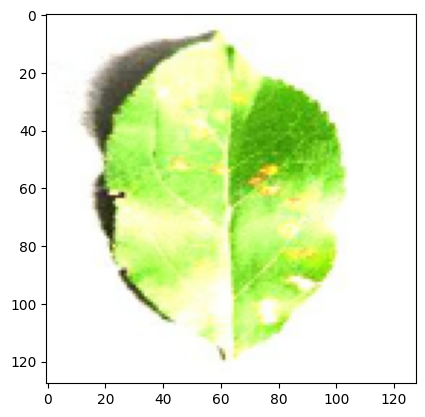

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 977ms/step
Label: AppleCedarRust2.JPG , Predicted: Apple___Cedar_apple_rust


In [58]:
# Assuming test is a tf.data.Dataset
# Get the first batch of images and labels from the dataset
for img_batch, label_batch in test.take(1):  # Take the first batch
    # Take the first image and label from the batch
    img = img_batch[0].numpy()  # Convert the first image to a NumPy array
    label = label_batch[0].numpy()  # Convert the first label to a NumPy array
    print((label))
    # Display the image
    plt.imshow(img)
    plt.show()

    # Predict the label using the Keras model
    predicted_label = predict_image(img, model, class_names)

    # Convert the label to a scalar index
    print('Label:', test_images[int(label)], ', Predicted:', predicted_label)


In [59]:
test_images

['AppleCedarRust1.JPG',
 'AppleCedarRust2.JPG',
 'AppleCedarRust3.JPG',
 'AppleCedarRust4.JPG',
 'AppleScab1.JPG',
 'AppleScab2.JPG',
 'AppleScab3.JPG',
 'CornCommonRust1.JPG',
 'CornCommonRust2.JPG',
 'CornCommonRust3.JPG',
 'PotatoEarlyBlight1.JPG',
 'PotatoEarlyBlight2.JPG',
 'PotatoEarlyBlight3.JPG',
 'PotatoEarlyBlight4.JPG',
 'PotatoEarlyBlight5.JPG',
 'PotatoHealthy1.JPG',
 'PotatoHealthy2.JPG',
 'TomatoEarlyBlight1.JPG',
 'TomatoEarlyBlight2.JPG',
 'TomatoEarlyBlight3.JPG',
 'TomatoEarlyBlight4.JPG',
 'TomatoEarlyBlight5.JPG',
 'TomatoEarlyBlight6.JPG',
 'TomatoHealthy1.JPG',
 'TomatoHealthy2.JPG',
 'TomatoHealthy3.JPG',
 'TomatoHealthy4.JPG',
 'TomatoYellowCurlVirus1.JPG',
 'TomatoYellowCurlVirus2.JPG',
 'TomatoYellowCurlVirus3.JPG',
 'TomatoYellowCurlVirus4.JPG',
 'TomatoYellowCurlVirus5.JPG',
 'TomatoYellowCurlVirus6.JPG']

In [60]:
img_batch.shape[0]

32

In [61]:
test

<_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [62]:
# Iterate through the entire test dataset
for img_batch, label_batch in test:  # Loop through all batches in the test dataset
    # Iterate through each image in the batch
    for i in range(img_batch.shape[0]):
        img = img_batch[i].numpy()  # Convert the image to a NumPy array
        label = label_batch[i].numpy()  # Convert the label to a NumPy array

        # Predict the label using the Keras model
        predicted_label = predict_image(img, model, class_names)
       
        # Convert the label to a scalar index
        true_label = test_images[i]

        # Print the true label and the predicted label
        print(f'Label: {true_label}, Predicted: {predicted_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Label: AppleCedarRust1.JPG, Predicted: Apple___Cedar_apple_rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Label: AppleCedarRust2.JPG, Predicted: Apple___Cedar_apple_rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Label: AppleCedarRust3.JPG, Predicted: Apple___Cedar_apple_rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Label: AppleCedarRust4.JPG, Predicted: Apple___Cedar_apple_rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Label: AppleScab1.JPG, Predicted: Apple___Apple_scab
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Label: AppleScab2.JPG, Predicted: Apple___Apple_scab
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Label: AppleScab3.JPG, Predicted: Apple___Apple_scab
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Label: CornCommonRust1.JPG, Predicted: Corn_(maize)___Common_rust_
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Label: CornCommonRust2.JPG, Predicted: Corn_(maize)___Common_rust_
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Label: CornCommonRust3.JPG, Predicted: Corn_(maize)___Common_rust_
1/1 